In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/OCR'

/content/gdrive/MyDrive/OCR


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68979, done.
remote: Total 68979 (delta 0), reused 0 (delta 0), pack-reused 68979
Receiving objects: 100% (68979/68979), 577.19 MiB | 15.05 MiB/s, done.
Resolving deltas: 100% (48606/48606), done.
Checking out files: 100% (2900/2900), done.


In [ ]:
%cd '/content/gdrive/MyDrive/OCR/models/research'

!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/OCR/models/research


In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd 'cocoapi/PythonAPI'

/content/gdrive/MyDrive/OCR/models/research/cocoapi/PythonAPI


In [ ]:
!make

In [ ]:
%cp -r pycocotools '/content/gdrive/MyDrive/OCR/models/research'

In [ ]:
%cd '/content/gdrive/MyDrive/OCR/models/research'

/content/gdrive/MyDrive/OCR/models/research


In [ ]:
%cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

In [ ]:
%cd '/content/gdrive/MyDrive/OCR/workspace/pre-trained-models'
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz

/content/gdrive/MyDrive/OCR/workspace/pre-trained-models
--2022-02-13 08:26:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.128, 2607:f8b0:400c:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  81.2MB/s    in 0.4s    

2022-02-13 08:26:06 (81.2 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [ ]:
!tar -xvf efficientdet_d0_coco17_tpu-32.tar.gz

efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32/checkpoint/
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d0_coco17_tpu-32/pipeline.config
efficientdet_d0_coco17_tpu-32/saved_model/
efficientdet_d0_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d0_coco17_tpu-32/saved_model/assets/
efficientdet_d0_coco17_tpu-32/saved_model/variables/
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.index


In [ ]:
%cd '/content/gdrive/My Drive/OCR/scripts'

/content/gdrive/My Drive/OCR/scripts


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/gdrive/MyDrive/OCR/workspace/images/train -l /content/gdrive/MyDrive/OCR/workspace/annotations/label_map.pbtxt -o /content/gdrive/MyDrive/OCR/workspace/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/gdrive/MyDrive/OCR/workspace/images/test -l /content/gdrive/MyDrive/OCR/workspace/annotations/label_map.pbtxt -o /content/gdrive/MyDrive/OCR/workspace/annotations/test.record


Successfully created the TFRecord file: /content/gdrive/MyDrive/OCR/workspace/annotations/train.record
Successfully created the TFRecord file: /content/gdrive/MyDrive/OCR/workspace/annotations/test.record


In [ ]:
%cd '/content/gdrive/MyDrive/OCR/workspace'

/content/gdrive/MyDrive/OCR/workspace


In [ ]:
!pip install opencv-python-headless==4.5.2.52

In [ ]:
!python model_main_tf2.py --model_dir=/content/gdrive/MyDrive/OCR/workspace/models/my_efficientdet_d0 --pipeline_config_path=/content/gdrive/MyDrive/OCR/workspace/models/my_efficientdet_d0/pipeline.config

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/gdrive/MyDrive/OCR/workspace/models/my_efficientdet_d0/pipeline.config --trained_checkpoint_dir /content/gdrive/MyDrive/OCR/workspace/models/my_efficientdet_d0 --output_directory /content/gdrive/MyDrive/OCR/workspace/exported-models/my_model

Loading model...Done! Took 32.626548051834106 seconds
Running inference for /content/gdrive/MyDrive/OCR/workspace/images/train/Cars27.png... Done


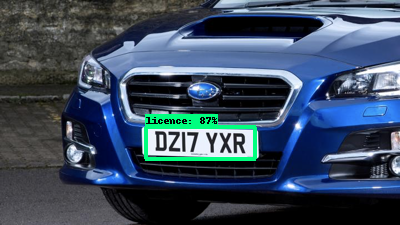

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'   
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/gdrive/MyDrive/OCR/workspace/images/train/Cars27.png'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/gdrive/MyDrive/OCR/workspace/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/gdrive/MyDrive/OCR/workspace/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=5,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

In [ ]:
detection_threshold = 0.5

In [ ]:
image = image_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [ ]:
width = image.shape[1]
height = image.shape[0]

In [ ]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

[0.5645763  0.3633768  0.70631784 0.6388245 ]
[127.02967376 145.3507185  158.92151445 255.529809  ]
[([[6, 0], [106, 0], [106, 31], [6, 31]], 'DZI7 YXR', 0.8149267886009733)]


In [ ]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

31
DZI7 YXR


In [ ]:
region_threshold = 0.05

In [ ]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [ ]:
filter_text(region, ocr_result, region_threshold)

['DZI7 YXR']

In [ ]:
region_threshold = 0.6

In [ ]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        #plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        cv2_imshow(region)
        plt.show()
        print(text)
        return text, region

In [ ]:
text, region = ocr_it(image_with_detections, detections, detection_threshold, region_threshold)

['DZI7 YXR']


In [ ]:
text

['DZI7 YXR']